In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

In [116]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"
template = "simple_white"

In [18]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0.1)",
        bordercolor="black",
        borderwidth=1
    )
)

In [146]:
names = ["0.npy", "0-new.npy", "1.npy", "1-new.npy", "2.npy", "2-new.npy", "3.npy", "3-new.npy"]

scores = np.block([np.load(f"scores/{filename}") for filename in names])
parameters = np.block([np.load(f"parameters/{filename}").T for filename in names]).T

In [147]:
scores.shape

(800,)

In [148]:
parameters.shape

(800, 7)

In [149]:
good = scores > 0.5
scores = scores[good]
parameters = parameters[good]

In [150]:
parameters_tsne = TSNE(2).fit_transform(parameters)
parameters_pca = PCA(2).fit_transform(parameters)

In [151]:
parameters_tsne.shape

(601, 2)

In [152]:
parameters_pca.shape

(601, 2)

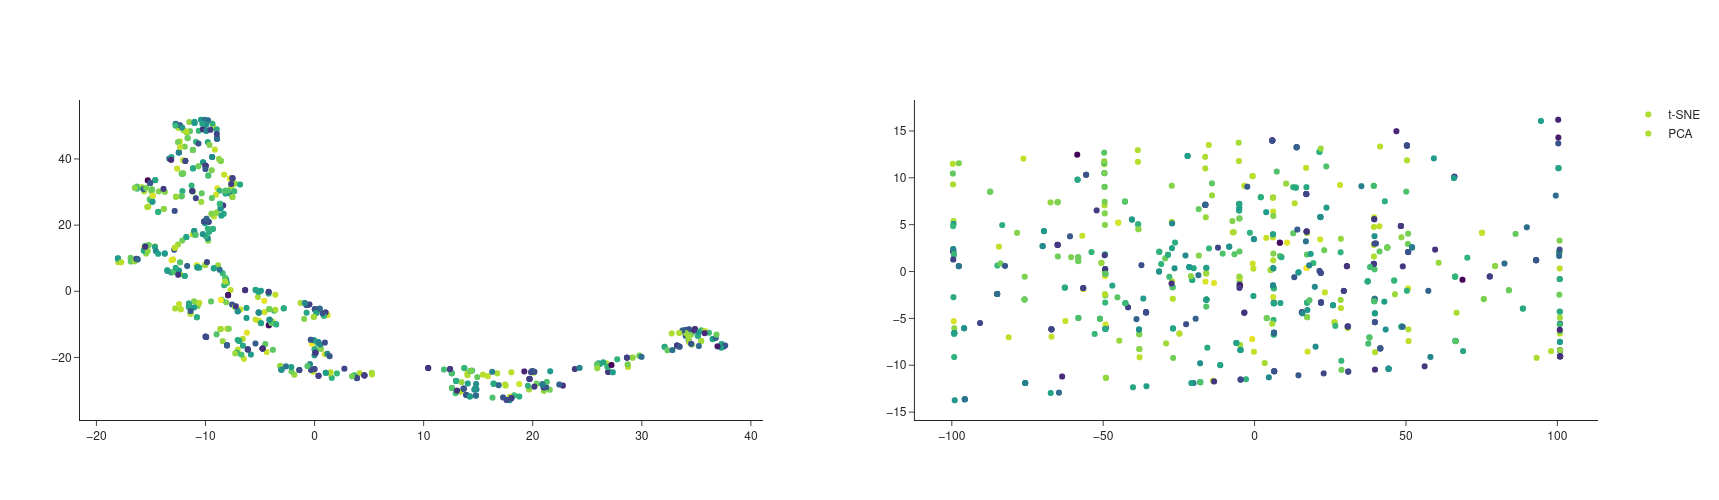

In [153]:
fig = make_subplots(rows=1, cols=2)
# fig.update_layout(layout)
fig.add_scatter(
    x=parameters_tsne[:, 0], y=parameters_tsne[:, 1], marker=dict(color=scores), name="t-SNE",
    mode="markers", row=1, col=1
)
fig.add_scatter(
    x=parameters_pca[:, 0], y=parameters_pca[:, 1], marker=dict(color=scores), name="PCA",
    mode="markers", row=1, col=2
)
fig.update_layout(height=500, width=1000)

In [155]:
np.load("scores/2.npy").max()

0.7928

In [ ]:
np.load("scores/2.npy").max()